### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [23]:
data = pd.read_csv('data/coupons.csv')

In [24]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

2. Investigate the dataset for missing or problematic data.

In [25]:
# Determine which columns contain null values
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [26]:
# Determine all the possible values of car
#data.query('car == "do not drive"' and 'Y == 1')
data[data['car'].isnull()].query('Y == 1')

destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
5      No Urgent Place  Friend(s)   Sunny           80   6PM   
6      No Urgent Place  Friend(s)   Sunny           55   2PM   
7      No Urgent Place     Kid(s)   Sunny           80  10AM   
...                ...        ...     ...          ...   ...   
12671  No Urgent Place    Partner   Snowy           30  10AM   
12676             Home      Alone   Sunny           80   6PM   
12677             Home    Partner   Sunny           30   6PM   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
2      Carry out & Take away         2h  Female  21  Unmarried partner  ...   
5            Restaurant(<20)         2h  Female  21  Unmarried partner  ...   
6      Carry out & Take away         1d  Female  21  Unmarried partner  ...   
7            Restaurant(<20)         2h  Female  21  Unmarried partner  ...   
...                      ...        ...     ...  ..                ...  ...   
12671        Restaurant(<20)         1d    Male  26             Single  ...   
12676      Restaurant(20-50)         1d    Male  26             Single  ...   
12677        Restaurant(<20)         1d    Male  26             Single  ...   
12679  Carry out & Take away         1d    Male  26             Single  ...   
12680  Carry out & Take away         1d    Male  26             Single  ...   

       CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0            never       NaN                  4~8              1~3   
2            never       NaN                  4~8              1~3   
5            never       NaN                  4~8              1~3   
6            never       NaN                  4~8              1~3   
7            never       NaN                  4~8              1~3   
...            ...       ...                  ...              ...   
12671        never       1~3                  4~8              1~3   
12676        never       1~3                  4~8              1~3   
12677        never       1~3                  4~8              1~3   
12679        never       1~3                  4~8              1~3   
12680        never       1~3                  4~8              1~3   

      toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                    1                 0                 0              0   
2                    1                 1                 0              0   
5                    1                 1                 0              0   
6                    1                 1                 0              0   
7                    1                 1                 0              0   
...                ...               ...               ...            ...   
12671                1                 0                 0              0   
12676                1                 0                 0              1   
12677                1                 1                 1              0   
12679                1                 0                 0              1   
12680                1                 0                 0              0   

      direction_opp  Y  
0                 1  1  
2                 1  1  
5                 1  1  
6                 1  1  
7                 1  1  
...             ... ..  
12671             1  1  
12676             0  1  
12677             1  1  
12679             0  1  
12680             1  1  

[7148 rows x 26 columns]

In [56]:
# Determine all the possible values of Bar
print(f"Coupon: {set(data[data['coupon'].notnull()]['coupon'])}")
print(f"Destination: {set(data[data['destination'].notnull()]['destination'])}")
print(f"Car: {set(data[data['car'].notnull()]['car'])}")
print(f"age: {set(data[data['age'].notnull()]['age'])}")
print(f"Bar: {set(data[data['Bar'].notnull()]['Bar'])}")
print(f"Income: {set(data[data['income'].notnull()]['income'])}")
print(f"passanger: {set(data[data['passanger'].notnull()]['passanger'])}")
print(f"maritalStatus: {set(data[data['maritalStatus'].notnull()]['maritalStatus'])}")
print(f"CoffeeHouse: {set(data[data['CoffeeHouse'].notnull()]['CoffeeHouse'])}")
print(f"CarryAway: {set(data[data['CarryAway'].notnull()]['CarryAway'])}")
print(f"RestaurantLessThan20: {set(data[data['RestaurantLessThan20'].notnull()]['RestaurantLessThan20'])}")
print(f"Restaurant20To50: {set(data[data['Restaurant20To50'].notnull()]['Restaurant20To50'])}")



Coupon: {'Carry out & Take away', 'Restaurant(<20)', 'Restaurant(20-50)', 'Bar', 'Coffee House'}
Destination: {'Home', 'No Urgent Place', 'Work'}
Car: {'Mazda5', 'Scooter and motorcycle', 'crossover', 'Car that is too old to install Onstar :D', 'do not drive'}
age: {'41', '36', '50plus', '26', '46', '31', '21', 'below21'}
Bar: {'less1', '1~3', 'never', 'gt8', '4~8'}
Income: {'$75000 - $87499', '$37500 - $49999', 'Less than $12500', '$100000 or More', '$12500 - $24999', '$25000 - $37499', '$62500 - $74999', '$87500 - $99999', '$50000 - $62499'}
passanger: {'Partner', 'Kid(s)', 'Alone', 'Friend(s)'}
maritalStatus: {'Divorced', 'Married partner', 'Unmarried partner', 'Single', 'Widowed'}
CoffeeHouse: {'less1', '1~3', 'never', 'gt8', '4~8'}
CarryAway: {'less1', '1~3', 'never', 'gt8', '4~8'}
RestaurantLessThan20: {'less1', '1~3', 'never', 'gt8', '4~8'}
Restaurant20To50: {'less1', '1~3', 'never', 'gt8', '4~8'}


4. What proportion of the total observations chose to accept the coupon?



In [6]:
accepted_count = len(data.query('Y == 1'))
print(f"{accepted_count} accepted the coupon out of {data.shape[0]} total observations")

7210 accepted the coupon out of 12684 total observations


In [7]:
accepted_proportion = accepted_count / data.shape[0]
print(f"The proportion of the total observations that chose to accept the coupon is {accepted_proportion}")

The proportion of the total observations that chose to accept the coupon is 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

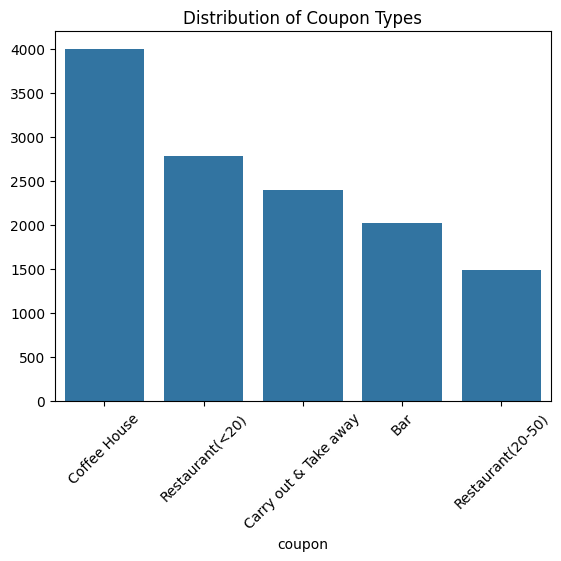

In [9]:
sns.barplot(x=data['coupon'].value_counts().index, y=data['coupon'].value_counts().values)
plt.tick_params(axis='x', labelrotation=45)
plt.title('Distribution of Coupon Types')
plt.show()

6. Use a histogram to visualize the temperature column.

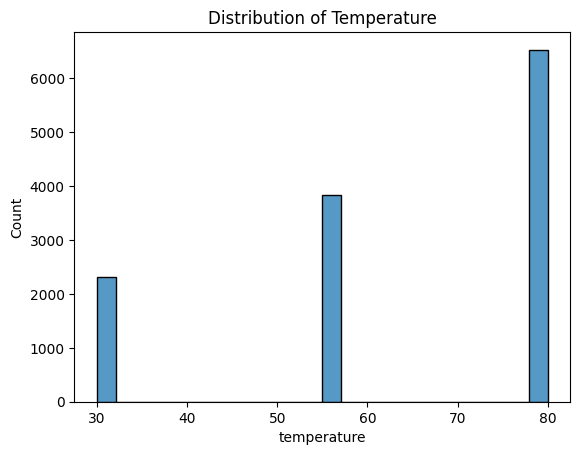

In [10]:
sns.histplot(data['temperature'])
plt.title('Distribution of Temperature')
plt.show()

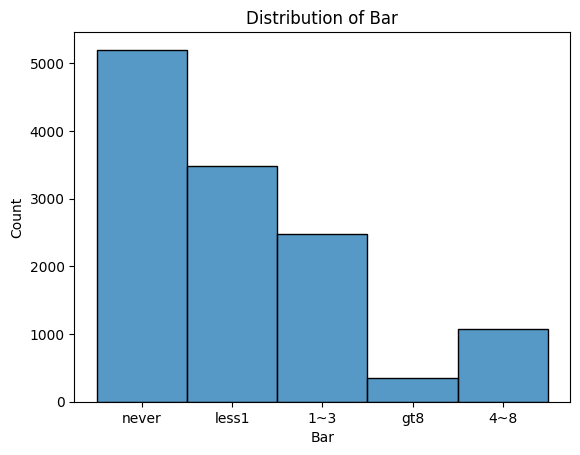

In [11]:
sns.histplot(data['Bar'])
plt.title('Distribution of Bar')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
bar_data = data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [13]:
bar_accepted = bar_data.query('Y == 1')
bar_accepted_port = len(bar_accepted) / accepted_count
print(f"The proportion of bar coupons that were accepted is {bar_accepted_port}")

The proportion of bar coupons that were accepted is 0.11470180305131761


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [55]:
bar_gt_3_accepted = bar_accepted[
    bar_accepted['Bar'].isin(['4~8', 'gt8'])
].shape[0]/ accepted_count
print(f"The proportion of coupons accepted for those who went to bar 3 or more times a month is {bar_gt_3_accepted}")
bar_lt_3_accepted = bar_accepted[
    ~bar_accepted['Bar'].isin(['4~8', 'gt8'])
].shape[0]/ accepted_count
print(f"The proportion of coupons accepted for those who went to bar 3 or less than 3 times a month is {bar_lt_3_accepted}")

The proportion of coupons accepted for those who went to bar 3 or more times a month is 0.021220527045769766
The proportion of coupons accepted for those who went to bar 3 or less than 3 times a month is 0.09348127600554786


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:
bar_gt_1 = bar_accepted[
    (bar_accepted['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_accepted['age'].isin(['31','50plus', '36', '41', '46']))
].shape[0]/ accepted_count
bar_gt_1


0.02233009708737864

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [16]:
bar_gt_1 = bar_accepted[
    (bar_accepted['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_accepted['passanger'] != 'Kid(s)') &
    (~bar_accepted['occupation'].isin(['Farming', 'Fishing', 'Forestry']))
].shape[0]/ accepted_count
bar_gt_1

0.05450762829403606

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [17]:
cond1 = bar_accepted[
    (bar_accepted['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_accepted['passanger'] != 'Kid(s)') &
    (~bar_accepted['maritalStatus'].isin(['Widowed']))
].shape[0]/ accepted_count
cond1
cond2 = bar_accepted[
    (bar_accepted['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_accepted['age'].isin(['below21', '26', '21']))
].shape[0]/ accepted_count
cond2
cond3 = data[
    (data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) |
    (data['Restaurant20To50'].isin(['4~8', 'gt8'])) &
    (data['income'] == 'less than 50K')
].shape[0] / accepted_count
cond3
print(f"cond1: {cond1}")
print(f"cond2: {cond2}")
print(f"cond3: {cond3}")

cond1: 0.05450762829403606
cond2: 0.03453536754507628
cond3: 0.6747572815533981


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The driver is more likely to accept the coupon if the driver eats out at the restaurant if the driver eats out more than 4 times at restaurant and has less than 50K of income.  The number of times the driver goes to Bar does not seem to influence the chance of the driver accepting the coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

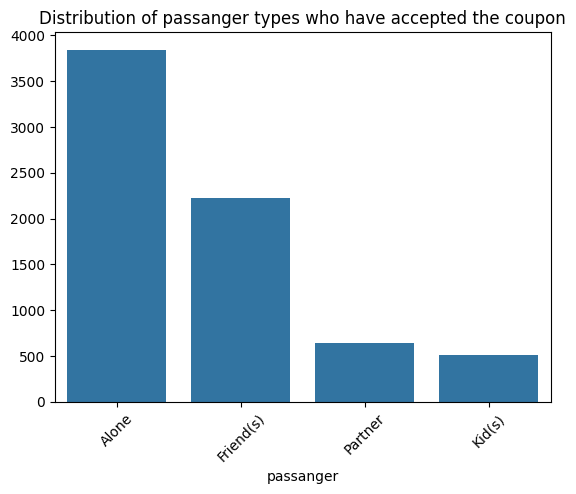

<Figure size 640x480 with 0 Axes>

In [41]:
coupon_accepted = data.query('Y == 1')
sns.barplot(x=coupon_accepted['passanger'].value_counts().index, y=coupon_accepted['passanger'].value_counts().values)
plt.tick_params(axis='x', labelrotation=45)
plt.title('Distribution of passanger types who have accepted the coupon')
plt.show()
plt.savefig('images/passanger_hist.png')

/tmp/ipython-input-20-2511665622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


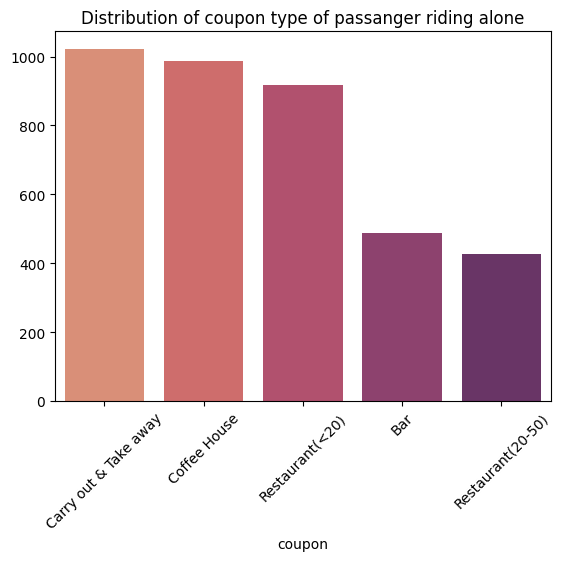

/tmp/ipython-input-20-2511665622.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


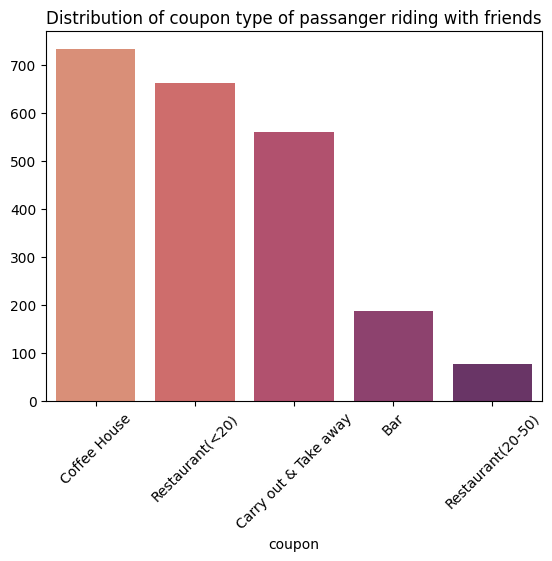

/tmp/ipython-input-20-2511665622.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


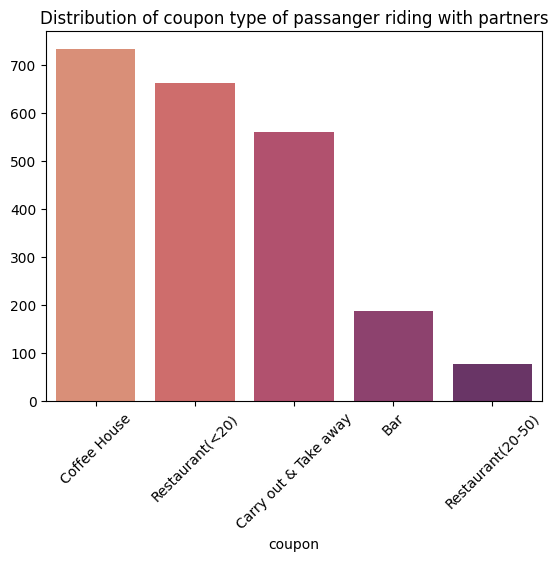

<Figure size 640x480 with 0 Axes>

In [20]:
alone_accepted = coupon_accepted.query('passanger == "Alone"')
sns.barplot(
    x=alone_accepted['coupon'].value_counts().index,
    y=alone_accepted['coupon'].value_counts().values,
    palette='flare'
)
plt.tick_params(axis='x', labelrotation=45)
plt.title('Distribution of coupon type of passanger riding alone')
plt.show()
plt.savefig('images/alone_passenger_hist.png')

friends_accepted = coupon_accepted.query('passanger == "Friend(s)"')
sns.barplot(
    x=friends_accepted['coupon'].value_counts().index,
    y=friends_accepted['coupon'].value_counts().values,
    palette='flare'
)
plt.tick_params(axis='x', labelrotation=45)
plt.title('Distribution of coupon type of passanger riding with friends')
plt.show()
plt.savefig('images/friends_passenger_hist.png')

partner_accepted = coupon_accepted.query('passanger == "Friend(s)"')
sns.barplot(
    x=partner_accepted['coupon'].value_counts().index,
    y=partner_accepted['coupon'].value_counts().values,
    palette='flare'
)
plt.tick_params(axis='x', labelrotation=45)
plt.title('Distribution of coupon type of passanger riding with partners')
plt.show()
plt.savefig('images/partners_passenger_hist.png')


In [128]:
alone_accepted = coupon_accepted.query('passanger == "Alone"')
sns.barplot(
    x=alone_accepted['coupon'].value_counts().index,
    y=alone_accepted['coupon'].value_counts().values,
    palette='flare'
)
plt.tick_params(axis='x', labelrotation=45)
plt.title('Distribution of coupon type of passanger riding alone')
plt.show()
plt.savefig('images/alone_passenger_hist.png')

friends_accepted = coupon_accepted.query('passanger == "Friend(s)"')
sns.barplot(
    x=friends_accepted['coupon'].value_counts().index,
    y=friends_accepted['coupon'].value_counts().values,
    palette='flare'
)
plt.tick_params(axis='x', labelrotation=45)
plt.title('Distribution of coupon type of passanger riding with friends')
plt.show()
plt.savefig('images/friends_passenger_hist.png')

partner_accepted = coupon_accepted.query('passanger == "Friend(s)"')
sns.barplot(
    x=partner_accepted['coupon'].value_counts().index,
    y=partner_accepted['coupon'].value_counts().values,
    palette='flare'
)
plt.tick_params(axis='x', labelrotation=45)
plt.title('Distribution of coupon type of passanger riding with partners')
plt.show()
plt.savefig('images/partners_passenger_hist.png')

Create a chart to best describe the relationship between income, passanger and whether it is likely to accept coupon or not.

In [128]:
#set(data[data['coupon'].notnull()]['coupon'])

def plot_data(data: pd.DataFrame, category: str, title: str, ax: plt.Axes):
    sns.barplot(
        x=data[category].value_counts().index,
        y=data[category].value_counts().values,
        ax=ax
    )
    ax.tick_params(axis='x', labelrotation=90, labelsize=60, labelleft=True)
    ax.tick_params(axis='y', labelsize=60)
    ax.set_title(f"{category}", fontsize=60)

all_categories = data.columns.tolist()
exclude_categories = ['Y']
coupon_accepted = data.query('Y == 1')

plot_index = 0
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(100, 80))

for category in all_categories:
    if category in exclude_categories:
        continue
    else:
        row = plot_index // 2
        col = plot_index % 2
        plot_data(
            data=coupon_accepted,
            category=category,
            title=f"{category} distribution",
            ax=axes[row, col]
        )
        plot_index += 1
        if plot_index % 4 == 0:
          fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(100, 80))
          plot_index = 0
plt.tight_layout()
plt.show()